## Download places365 resnet50 pytorch model

In [0]:
! wget http://places2.csail.mit.edu/models_places365/resnet50_places365.pth.tar

--2019-03-27 02:36:21--  http://places2.csail.mit.edu/models_places365/resnet50_places365.pth.tar
Resolving places2.csail.mit.edu (places2.csail.mit.edu)... 128.30.100.255
Connecting to places2.csail.mit.edu (places2.csail.mit.edu)|128.30.100.255|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97270159 (93M) [application/x-tar]
Saving to: ‘resnet50_places365.pth.tar’

resnet50_places365. 100%[===================>]  92.76M  13.9MB/s    in 8.7s    

2019-03-27 02:36:31 (10.7 MB/s) - ‘resnet50_places365.pth.tar’ saved [97270159/97270159]



## Import fastai dependencies

In [0]:
import fastai
from fastai import *
from fastai.vision import *

In [0]:
np.random.seed(42)

In [0]:
image_path = 'train/'
image_folder = 'train/'
train_csv = 'train.csv'
test_image_folder = 'test/'
test_csv = 'test_WyRytb0.csv'

## Create data generator

In [0]:
data = ImageDataBunch.from_csv(path=image_path, folder=image_folder, csv_labels=train_csv, label_col=1, bs=32, 
                               test= test_image_folder, ds_tfms=get_transforms(), size=224, num_workers=4)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (13628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,4,5,0,4
Path: train;

Valid: LabelList (3406 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
5,5,0,0,2
Path: train;

Test: LabelList (7301 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: train

In [0]:
print(data.classes)

[0, 1, 2, 3, 4, 5]


## Define resnet50 learner


In [0]:
## To create a ResNET 50 with pretrained weights
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 87582736.87it/s]


## Loading best saved model (this should be saved inside directory train/model/)

In [0]:
learn.load('resnet_963')

Learner(data=ImageDataBunch;

Train: LabelList (13628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,4,5,0,4
Path: train;

Valid: LabelList (3406 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
5,5,0,0,2
Path: train;

Test: LabelList (7301 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1,

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


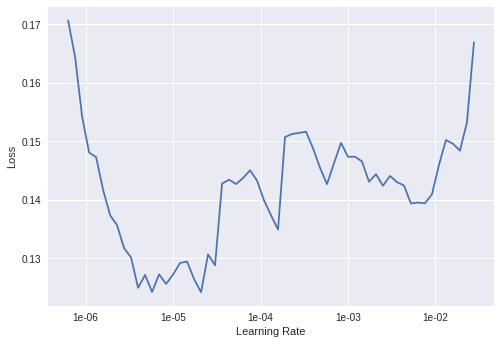

In [0]:
learn.recorder.plot()

## Before deleting top loss images

In [0]:
learn.fit_one_cycle(3, 1e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.141153,0.102813,0.962713,04:12
1,0.141759,0.102341,0.964181,04:07
2,0.126412,0.102729,0.964181,04:07


## After deleting top loss images

## Defining Learner object

In [0]:
import re 

def _load_model(directory,strict_loading=True,**kwargs):
  print('Loading pretrained weights')
  if isinstance(directory,dict):
      state_dict = directory
  else:           
      state_dict = torch.load(directory, map_location=lambda storage, loc: storage)
  new_state_dict = OrderedDict()
  
  for k, v in state_dict['state_dict'].items():
      if k[:7] == 'module.':
          name = k[7:] # remove `module`.
      else:
          name = k
      new_state_dict[name] = v
  return new_state_dict

In [0]:
weights = _load_model('resnet50_places365.pth.tar')

Loading pretrained weights


In [0]:
model = models.resnet50()

model.fc = torch.nn.Linear(2048, 365)
model.load_state_dict(weights)

def get_model(pretrained):
  return model

In [0]:
data = ImageDataBunch.from_csv(path=image_path, folder=image_folder, csv_labels=train_csv, label_col=1, bs=32, 
                               test= test_image_folder, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

learn = cnn_learner(data, get_model, metrics=accuracy)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


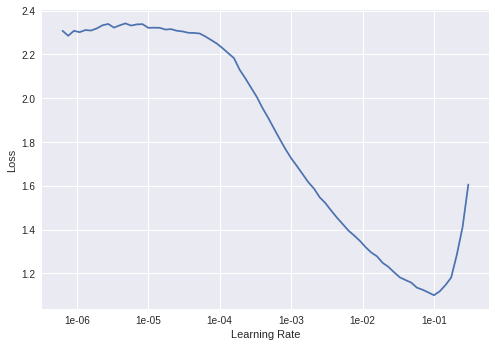

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.272265,0.191268,0.929982,04:03
1,0.241479,0.165586,0.941652,04:03
2,0.200483,0.155547,0.947337,04:03
3,0.143760,0.151989,0.947935,04:03
4,0.131458,0.149138,0.950628,04:03


In [0]:
learn.lr_find(start_lr=1e-09)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


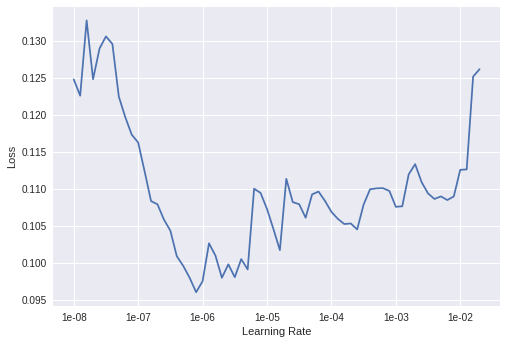

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-07))

epoch,train_loss,valid_loss,accuracy,time
0,0.130597,0.150969,0.950928,04:05
1,0.117256,0.150540,0.948833,04:05
2,0.126902,0.149061,0.950030,04:05


In [0]:
learn.unfreeze()

In [0]:
learn.lr_find(start_lr=1e-12)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


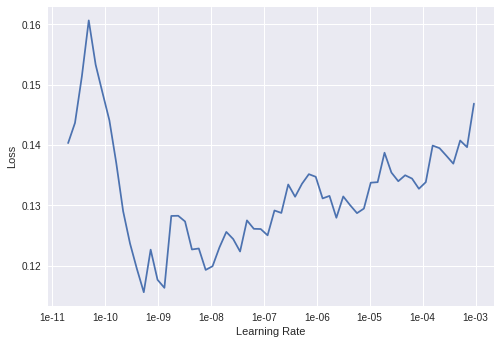

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr=slice(8e-10, 1e-08))

epoch,train_loss,valid_loss,accuracy,time
0,0.142099,0.150871,0.948833,05:25
1,0.130583,0.150972,0.947636,05:21
2,0.137359,0.150658,0.949431,05:24
3,0.142411,0.152425,0.950329,05:20
4,0.129657,0.150741,0.949132,05:24


In [0]:
learn.save('alex_delete_unfreeze')

In [0]:
learn = cnn_learner(data, models.alexnet, metrics=accuracy)
learn.load('alex_delete_unfreeze')

Learner(data=ImageDataBunch;

Train: LabelList (13120 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,4,5,0,4
Path: train;

Valid: LabelList (3279 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
2,0,4,3,2
Path: train;

Test: LabelList (7301 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: train, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_m

## After removing val top loss images

In [0]:
data = ImageDataBunch.from_csv(path=image_path, folder=image_folder, csv_labels=train_csv, label_col=1, bs=32, 
                               test= test_image_folder, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

learn = cnn_learner(data, get_model, metrics=accuracy)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


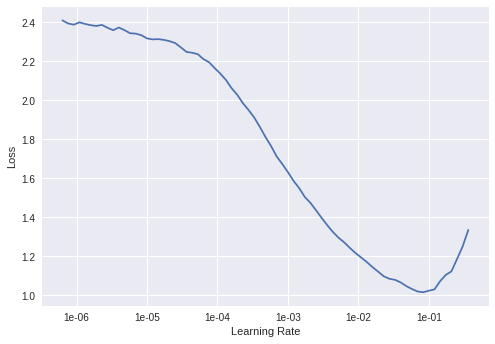

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.376745,0.500952,0.840169,04:04
1,0.358376,0.253823,0.913148,04:00
2,0.308906,0.259907,0.906212,04:01
3,0.208503,0.171152,0.939385,04:00
4,0.166227,0.146480,0.950543,04:00


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


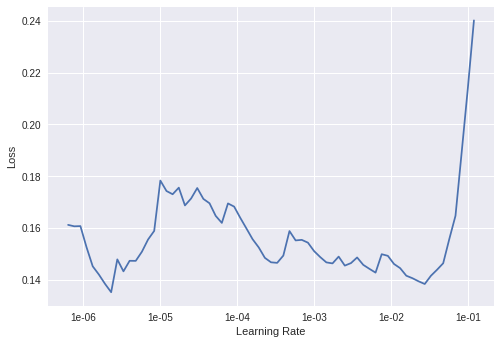

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, 1e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.193012,0.145757,0.951146,03:59
1,0.156659,0.147024,0.947527,04:00
2,0.165957,0.145853,0.950241,03:59


In [0]:
! ls train/train/ | wc -l

24335


In [0]:
data

ImageDataBunch;

Train: LabelList (13372 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,4,0,1,5
Path: train;

Valid: LabelList (3342 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
4,3,0,5,4
Path: train;

Test: LabelList (7301 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: train

In [0]:
train_df = pd.read_csv('train/train.csv')
test_df = pd.read_csv('test/test_WyRytb0.csv')
print(f'Train: {train_df.shape} \nTest: {test_df.shape}')

Train: (17034, 2) 
Test: (7301, 1)


In [0]:
learn.save('alex_tta_94.6')

In [0]:
! cp train/models/alex_tta_94.6.pth drive/My\ Drive/fastai_models

In [0]:
valid_interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[(3, 2, 67),
 (2, 3, 62),
 (0, 5, 44),
 (2, 4, 17),
 (5, 0, 15),
 (3, 4, 14),
 (4, 2, 9),
 (4, 3, 7),
 (2, 1, 6),
 (1, 3, 5),
 (2, 5, 5),
 (0, 4, 3),
 (4, 1, 3),
 (0, 1, 2),
 (1, 2, 2),
 (4, 0, 2)]

{'buildings' -> 0, 

'forest' -> 1,

'glacier' -> 2,

'mountain' -> 3,

'sea' -> 4,

'street' -> 5 }

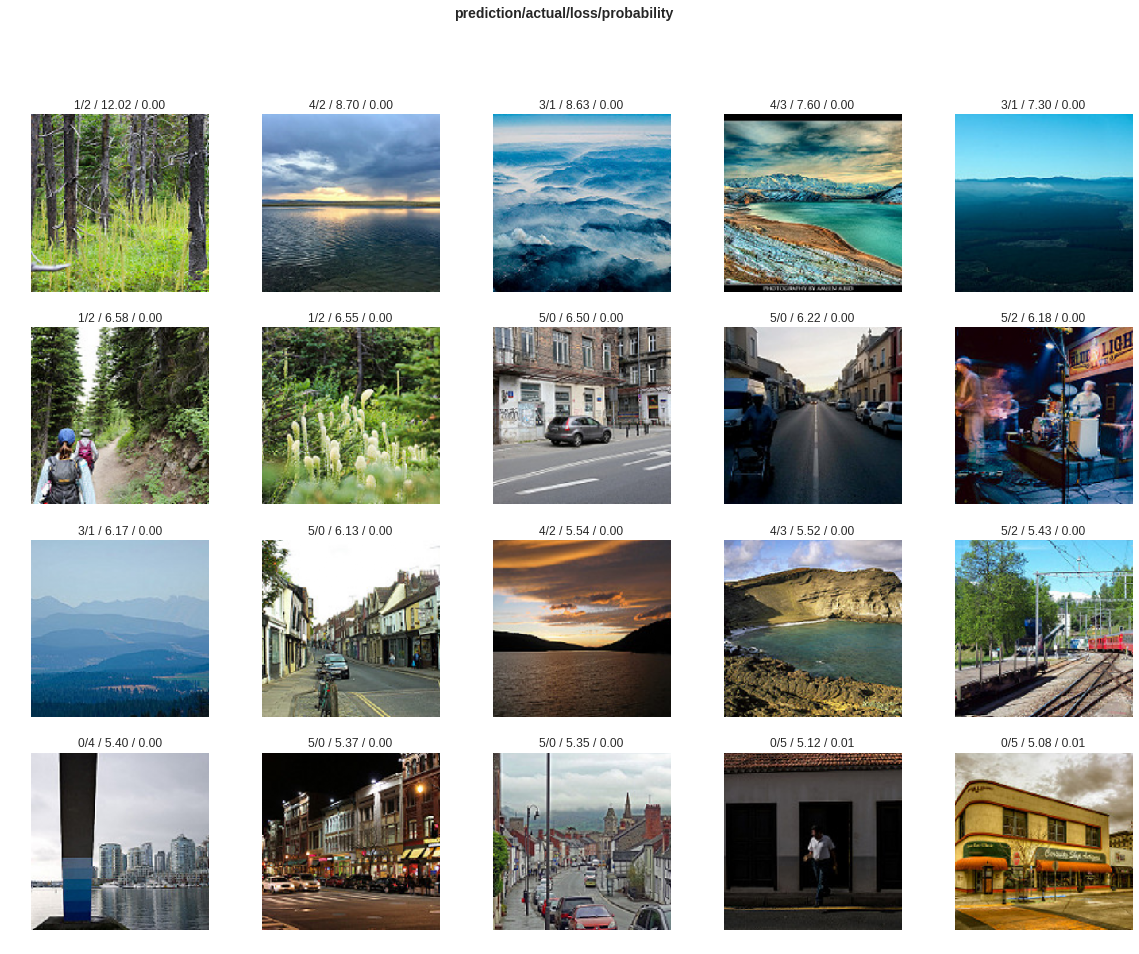

In [0]:
interp.plot_top_losses(20, figsize=(20,15), heatmap=False)

## Find top losses path and remove them from our training pipeline

**For Train Data**

In [0]:
train_interp = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Train)

In [0]:
models.resnet50()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
losses, idx = train_interp.top_losses()
top_losses_path = data.train_ds.x[idx]

In [0]:
len(losses[losses > 2])

597

In [0]:
top_losses_final = top_losses_path.items[0:159]

for i in range(159):
  os.remove(top_losses_final[i])

In [0]:
delete_paths = []
for path in top_losses_final:
  delete_paths.append(re.sub('train/train//', '', path))

In [0]:
train_df = pd.read_csv('train/train.csv')
discarded_train = train_df.loc[~train_df.image_name.isin(delete_paths)]

In [0]:
! rm train/train.csv
discarded_train.to_csv('train/train.csv', index=False)

**For validation data**

In [0]:
valid_interp = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Valid)
val_losses, valid_idx = valid_interp.top_losses()
top_val_losses_path = data.valid_ds.x[valid_idx]

In [0]:
len(val_losses[val_losses > 2])

62

In [0]:
top_losses_val_final = top_val_losses_path.items[0:62]

for i in range(62):
  os.remove(top_losses_val_final[i])

In [0]:
delete_paths = []
for path in top_losses_val_final:
  delete_paths.append(re.sub('train/train//', '', path))
  
train_df = pd.read_csv('train/train.csv')
discarded_train = train_df.loc[~train_df.image_name.isin(delete_paths)]

! rm train/train.csv
discarded_train.to_csv('train/train.csv', index=False)

In [0]:
doc(interp.top_losses)

## After removing loss>2, training and val data

In [0]:
data = ImageDataBunch.from_csv(path=image_path, folder=image_folder, csv_labels=train_csv, label_col=1, bs=64, 
                               test= test_image_folder, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

# learn = cnn_learner(data, get_model, metrics=accuracy)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


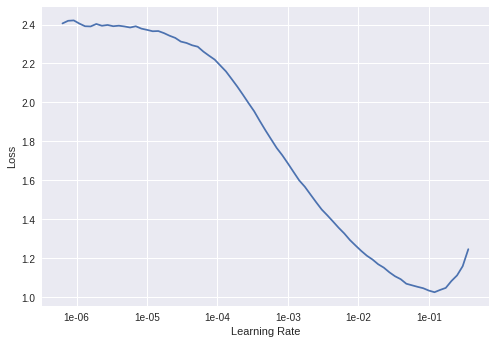

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.264610,0.181115,0.941701,04:02
1,0.201014,0.155498,0.948840,03:57
2,0.171848,0.147645,0.950922,03:57
3,0.127873,0.144935,0.954491,03:58
4,0.107244,0.144766,0.952707,03:58


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


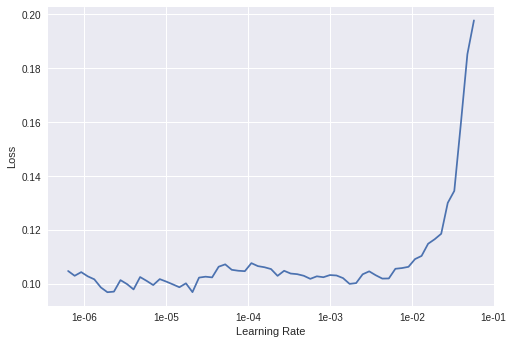

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-06, 3e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.106203,0.144404,0.955086,03:57
1,0.103903,0.144232,0.953302,03:58
2,0.101291,0.144138,0.954194,03:57


In [0]:
ds_type = DatasetType.Test
predictions = learn.get_preds(ds_type)

In [0]:
predictions

[tensor([[2.9721e-05, 4.7506e-04, 2.0306e-02, 9.7909e-01, 4.8324e-05, 5.2674e-05],
         [7.4683e-05, 1.0641e-05, 9.9198e-01, 7.4894e-03, 2.6587e-04, 1.8422e-04],
         [9.9999e-01, 2.8111e-07, 3.8229e-08, 4.6700e-08, 1.9322e-06, 8.5695e-06],
         ...,
         [1.7825e-05, 7.6189e-04, 4.5881e-01, 5.4023e-01, 1.1402e-04, 6.2850e-05],
         [7.6884e-03, 2.8061e-06, 4.4346e-06, 2.2517e-05, 3.5758e-06, 9.9228e-01],
         [6.7938e-04, 1.9298e-05, 2.8464e-05, 9.3620e-06, 1.7519e-05, 9.9925e-01]]),
 tensor([0, 0, 0,  ..., 0, 0, 0])]

In [0]:
image_name = pd.Series(os.listdir('train/test/'), name='image_name')
label = pd.Series(np.argmax(predictions[0], axis=1), name='label')
submission_df = pd.concat([image_name, label], axis=1)
submission_df.to_csv('submission_res_net_loss_3.csv', index=False)

## Test Time Augmentation

In [0]:
tta_predictions = learn.TTA(ds_type=DatasetType.Test)

In [0]:
image_name = pd.Series(os.listdir('train/test/'), name='image_name')
label = pd.Series(np.argmax(tta_predictions[0], axis=1), name='label')
submission_df = pd.concat([image_name, label], axis=1)
submission_df.to_csv('submission_tta_resnet_loss_3.csv', index=False)

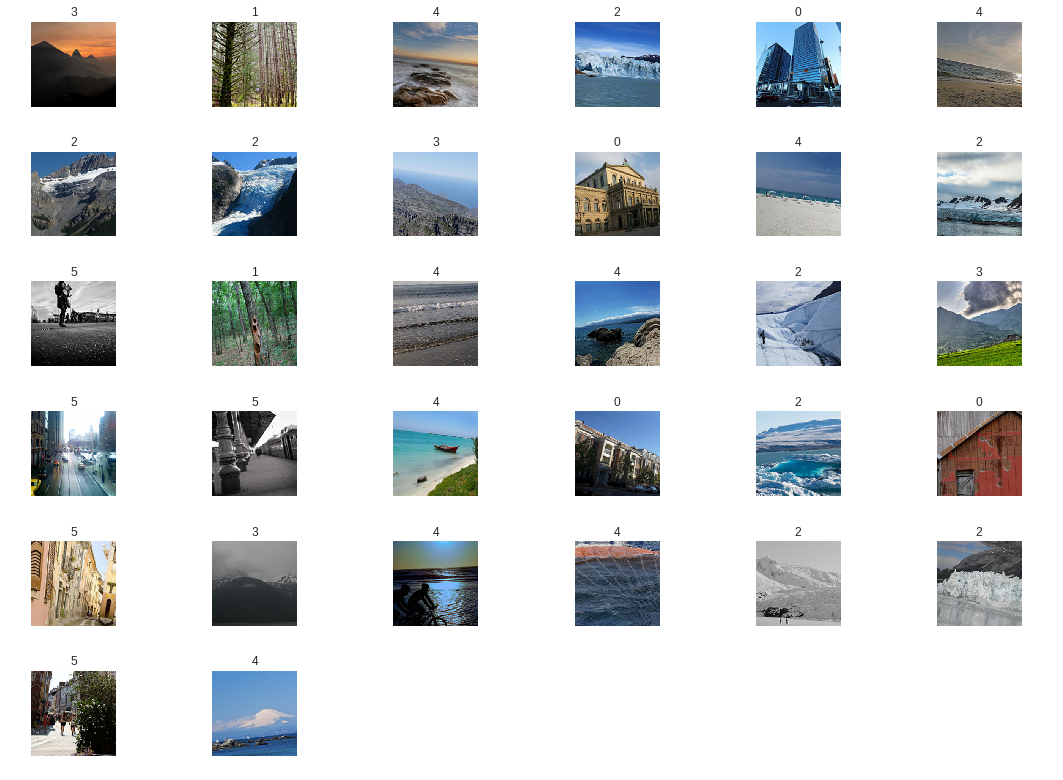

In [0]:
data.show_batch(9, figsize=(15,11))